We import the right modules

In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import griddata
import warnings
import time
from numba import jit
import loop_SE_fortran
import numpy.ma as ma
import matplotlib.colors as colors
from make_SE_module import SingularityExponents
%matplotlib inline

We download the netCDF file, create a Basemap object, prepare structured arrays with lon, lat, sst

In [ ]:
mur_file = "A2017206020500.L2_LAC_SST4.nc"
dte = mur_file[1:8]
night_sst4 = 'yes'
# ------------------------------------------------------------------------------------

# parameters (coordinates limits, values of sst max/min) of the plot
lonmin, lonmax, latmin, latmax = -3, 0, 35, 38

M = Basemap(projection = 'cyl',llcrnrlon = lonmin,
                                   urcrnrlon = lonmax,
                                   llcrnrlat = latmin,
                                   urcrnrlat = latmax,
                                   lat_ts = 37.,
                                   resolution = 'h')


# netCDF file processing

with Dataset(mur_file) as nc:

    nav = nc.groups['navigation_data']
    lon = nav.variables['longitude'][:]
    lat = nav.variables['latitude'][:]
    geo = nc.groups['geophysical_data']

    if night_sst4 == 'no':
        sst = geo.variables['sst'][:]
    if night_sst4 == 'yes':
        sst = geo.variables['sst4'][:]

x, y = lon, lat

# --------------------------------------------------------------------------
# data processing
    
# take the data in the limits defined previously
lon0 = lon[(lon > lonmin) & (lon < lonmax) & (lat > latmin) & (lat < latmax)]
lat0 = lat[(lon > lonmin) & (lon < lonmax) & (lat > latmin) & (lat < latmax)]
sst0 = sst[(lon > lonmin) & (lon < lonmax) & (lat > latmin) & (lat < latmax)]



# creating a grid with all the values (interpolation made)
m = 500
lon1,lat1 = np.meshgrid(np.linspace(np.min(lon0),np.max(lon0),m),
                        np.linspace(np.min(lat0),np.max(lat0),m))
sst1 = griddata((lon0, lat0), sst0,(lon1, lat1))

tmin, tmax = 22, 28

We call the SingularityExponents module

In [3]:
se = SingularityExponents(sst1)

Create a reference SST image

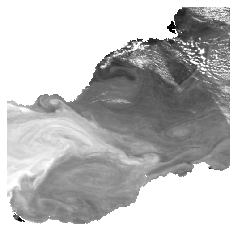

In [4]:
se._ref_image(lon1, lat1, sst1, dte, tmin, tmax, M)

Call the module that computes the Singularity Exponents values 

In [5]:
lst5 = se._compute_SE(sst1)

Plot of the values

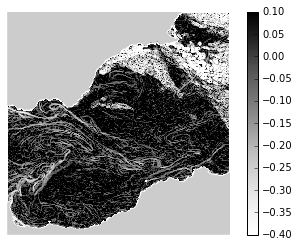

In [6]:
se._se_image(lon1, lat1, lst5, dte, M)

We try to enlight the values representing a frontal area, but it is not working properly yet because of the clouds

In [7]:
se_en = se._detect_edge(lst5)

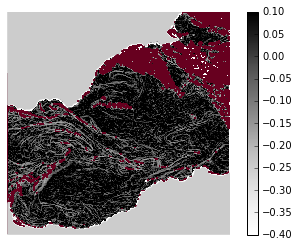

In [8]:
se._plot_edges_detected(lon1, lat1, lst5, dte, se_en, M)

In [9]:
plt.close('all')

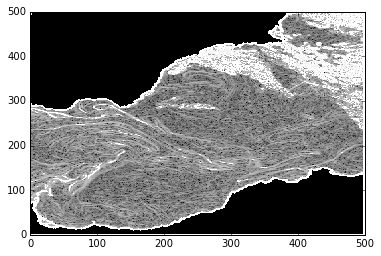

In [10]:
plt.pcolormesh(lst5, vmin=-.6, vmax=.6, cmap='Greys')